<a href="https://colab.research.google.com/github/pp2444/ASA_Spring2021/blob/main/ASA_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Metropolis-Hasting algorithm for sampling Gaussian distribution

*  Use Metropolis-Hasting to construct a Markov chain with the standard Gaussian distribution in $d$-dimensions as its invariant distribution.
*  Use your imagination (and lots of plots) to demonstrate that your code is correctly sampling the Gaussian.
*  As your proposal distribution use $q(y|x) \sim \mathcal{N}(\mu, s^2 I_d)$ and experiment with different values of $s$ ($I_d$ is the $d\times d$ identity matrix).
*  Does it seem to converge faster for some values of s than for others?
*  What happens when you increase d?  Finally, try proposing moves in one dimension at a time, i.e. add a small Gaussian perturbation to just one coordinate, then accept/reject, then perturb another coordinate, accept/reject, etc.
*  Does this work better or worse than perturbing all of the coordinates at once?

In [491]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

$d$-dimensional Gaussian Distribution as Proposal distribution 
$$
    f(x) = \frac{1}{\sqrt{(2\pi)^d \det(\Sigma)}}e^{-\frac{1}{2}(x-\mu)^t \Sigma^{-1}(x-\mu)} \quad x, \mu \in \mathbb{R}^d, \; \Sigma = s^2 I_d \in \mathbb{R}(d,d)
$$

In [341]:
def proposal_distribution(x, d, mu, cov):
    return np.exp(-0.5* (x-mu).T @ np.linalg.inv(cov) @ (x-mu))/((2*np.pi)**(d/2)*np.linalg.det(cov)**0.5)

In [469]:
def metropolis_hasting_gauss(d, mu, std, steps):
    burn_in_time = int(0.2*steps) # Initial transient length of timestep to throw away

    cov = np.eye(d)*std**2  # covariance matrix for the gaussian distribution

    distribution = np.zeros((steps,d))                      # Final distribution
    curr_var = np.random.uniform(-3*std, 3*std, size=d)     # Initial random variable X_0

    for step in range(steps):
        distribution[step] = curr_var
        next_var = np.random.uniform(-3*std, 3*std, size=d) # Proposed state Y

        # Compute acceptance probability - Metropolis-Hasting Algorithm
        prob_accept = min(1, proposal_distribution(next_var, d, mu, cov)/proposal_distribution(curr_var, d, mu, cov))
        
        # Based on uniform distribution accept/reject the state
        if np.random.uniform(0,1) < prob_accept:
            curr_var = next_var
    
    return distribution[burn_in_time:]

One dimensional Gaussian distribution - In 1000 steps, the distribution converges to gaussian. s=1, mean=0.

Sample Mean: -0.0212 - Mu: 0, Sample std: 0.9201 - s: 1


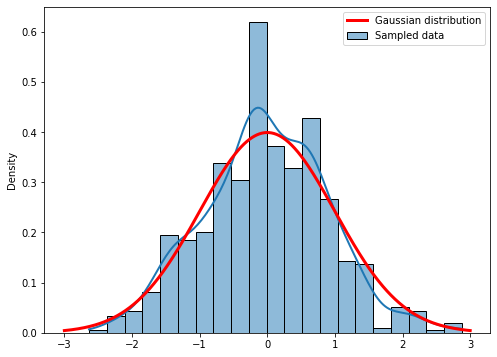

In [648]:
d = 1                   # dimensions
std = 1               # sd of gaussian distribution
mu = np.zeros(d)        # mu of gaussian distribution
steps = 1000           # Total number of states


fig1 = plt.figure(figsize=(8,6))
mc_gauss = metropolis_hasting_gauss(d, mu, std, steps)
# plt.hist(mc_gauss, bins=20, density=True);
sns.histplot(mc_gauss, kde=True, stat='density', legend=False, label='Sampled data', line_kws={'lw':2})
horz = np.linspace(-3,3,1000)
norm = [proposal_distribution(x=i, d=1, mu=np.zeros(1), cov=np.eye(1)*std**2) for i in horz]
sns.lineplot(x=horz, y=norm, color='red', lw=3, label='Gaussian distribution');
print(f'Sample Mean: {mc_gauss.mean():0.4f} - Mu: 0, Sample std: {mc_gauss.std():0.4f} - s: {std}')

Two dimensional Gaussian distribution - In 2000 steps, the distribution converges to gaussian. s=1, mean=0.

Sample Mean: [-0.03 -0.04] - Mu: [0. 0.], Sample std: 0.9655 - s: 1


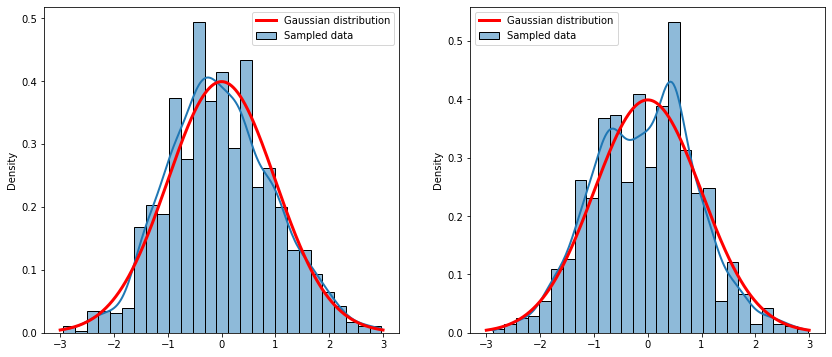

In [657]:
d = 2                   # dimensions
std = 1               # sd of gaussian distribution
mu = np.zeros(d)        # mu of gaussian distribution
steps = 2000         # Total number of states

fig2 = plt.figure(figsize=(14,6))
plt.subplot(121)
mc_gauss = metropolis_hasting_gauss(d, mu, std, steps)
# plt.hist(mc_gauss, bins=20, density=True);
sns.histplot(mc_gauss[:,0], kde=True, stat='density', legend=False, label='Sampled data', line_kws={'lw':2})
horz = np.linspace(-3,3,1000)
norm = [proposal_distribution(x=i, d=1, mu=np.zeros(1), cov=np.eye(1)*std**2) for i in horz]
sns.lineplot(x=horz, y=norm, color='red', lw=3, label='Gaussian distribution');

plt.subplot(122)
sns.histplot(mc_gauss[:,1], kde=True, stat='density', legend=False, label='Sampled data', line_kws={'lw':2})
sns.lineplot(x=horz, y=norm, color='red', lw=3, label='Gaussian distribution');

print(f'Sample Mean: {np.round(mc_gauss.mean(axis=0),2)} - Mu: {mu}, Sample std: {mc_gauss.std():0.4f} - s: {std}')

Four dimensional Gaussian distribution - In 5000 steps, the distribution converges to gaussian. s=1, mean=0.

Sample Mean: [ 0.05  0.02 -0.    0.03] - Mu: [0. 0. 0. 0.], Sample std: 1.0014 - s: 1


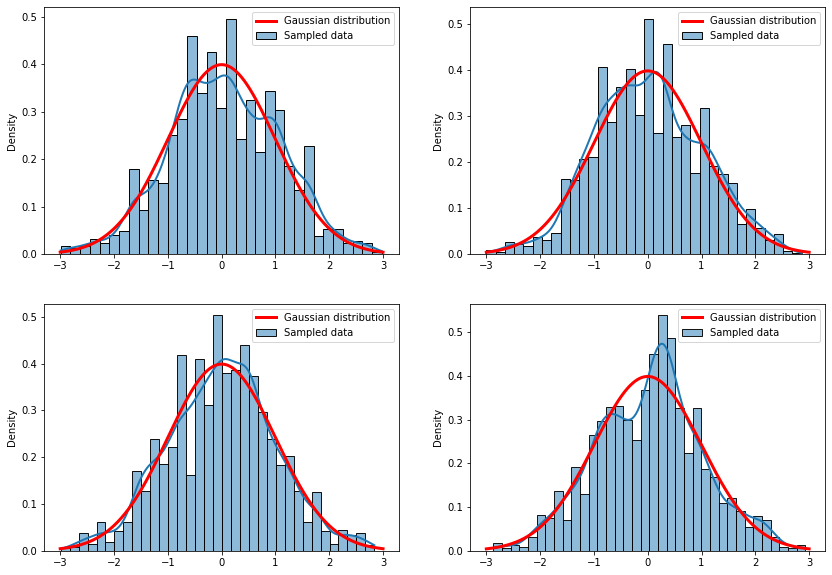

In [667]:
d = 4                   # dimensions
std = 1               # sd of gaussian distribution
mu = np.zeros(d)        # mu of gaussian distribution
steps = 5000         # Total number of states

fig3=plt.figure(figsize=(14,10))

mc_gauss = metropolis_hasting_gauss(d, mu, std, steps)

horz = np.linspace(-3,3,1000)
norm = [proposal_distribution(x=i, d=1, mu=np.zeros(1), cov=np.eye(1)*std**2) for i in horz]

plt.subplot(221)
sns.histplot(mc_gauss[:,0], kde=True, stat='density', legend=False, label='Sampled data', line_kws={'lw':2})
sns.lineplot(x=horz, y=norm, color='red', lw=3, label='Gaussian distribution');

plt.subplot(222)
sns.histplot(mc_gauss[:,1], kde=True, stat='density', legend=False, label='Sampled data', line_kws={'lw':2})
sns.lineplot(x=horz, y=norm, color='red', lw=3, label='Gaussian distribution');

plt.subplot(223)
sns.histplot(mc_gauss[:,2], kde=True, stat='density', legend=False, label='Sampled data', line_kws={'lw':2})
sns.lineplot(x=horz, y=norm, color='red', lw=3, label='Gaussian distribution');

plt.subplot(224)
sns.histplot(mc_gauss[:,3], kde=True, stat='density', legend=False, label='Sampled data', line_kws={'lw':2})
sns.lineplot(x=horz, y=norm, color='red', lw=3, label='Gaussian distribution');

print(f'Sample Mean: {np.round(mc_gauss.mean(axis=0),2)} - Mu: {mu}, Sample std: {mc_gauss.std():0.4f} - s: {std}')

In the 1,2 and 4 dimensions, it can be observed that the sampled data is very similar to Gaussian data. Hence the data is being sampled right. QQ 0 plot could be used tii check

Changing $s$ values

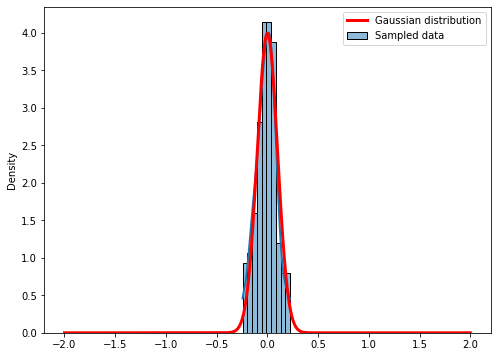

In [618]:
d = 1                   # dimensions
std = 0.1               # sd of gaussian distribution
mu = np.zeros(d)        # mu of gaussian distribution
steps = 200           # Total number of states

fig4 = plt.figure(figsize=(8,6))
mc_gauss = metropolis_hasting_gauss(d, mu, std, steps)
# plt.hist(mc_gauss, bins=20, density=True);
sns.histplot(mc_gauss, kde=True, stat='density', legend=False, label='Sampled data', line_kws={'lw':2})
horz = np.linspace(-2,2,1000)
norm = [proposal_distribution(x=i, d=1, mu=np.zeros(1), cov=np.eye(1)*std**2) for i in horz]
sns.lineplot(x=horz, y=norm, color='red', lw=3, label='Gaussian distribution');

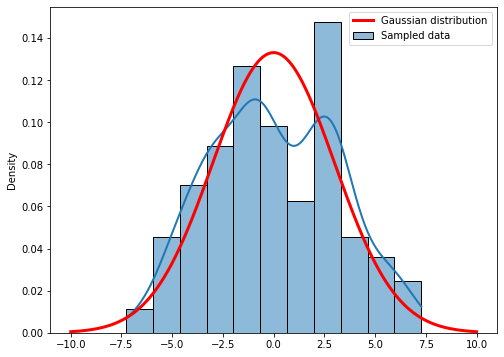

In [617]:
d = 1                   # dimensions
std = 3               # sd of gaussian distribution
mu = np.zeros(d)        # mu of gaussian distribution
steps = 500           # Total number of states


fig5 = plt.figure(figsize=(8,6))
mc_gauss = metropolis_hasting_gauss(d, mu, std, steps)
# plt.hist(mc_gauss, bins=20, density=True);
sns.histplot(mc_gauss, kde=True, stat='density', legend=False, label='Sampled data', line_kws={'lw':2})
horz = np.linspace(-10,10,1000)
norm = [proposal_distribution(x=i, d=1, mu=np.zeros(1), cov=np.eye(1)*std**2) for i in horz]
sns.lineplot(x=horz, y=norm, color='red', lw=3, label='Gaussian distribution');

It converges for smaller $s$ values faster compared to highte values.

With Gaussian perturbations

In [640]:
def metropolis_hasting_gauss_mod(d, mu, std, steps):
    burn_in_time = int(0.2*steps) # Initial transient length of timestep to throw away

    cov = np.eye(d)*std**2  # covariance matrix for the gaussian distribution

    distribution = np.zeros((steps,d))                      # Final distribution
    curr_var = distribution[0]     # Initial random variable X_0
    curr_var = np.random.uniform(-3*std, 3*std, size=d)
    n = 0
    for step in range(steps):
        distribution[step] = curr_var
        next_var = curr_var # Proposed state Y
        next_var[n] = np.random.normal(loc=mu[n],scale=std**2)
        # Compute acceptance probability - Metropolis-Hasting Algorithm
        prob_accept = min(1, proposal_distribution(next_var, d, mu, cov)/proposal_distribution(curr_var, d, mu, cov))
        
        # Based on uniform distribution accept/reject the state
        if np.random.uniform(0,1) < prob_accept:
            curr_var = next_var
        n += 1
        n %= d
    
    return distribution[burn_in_time:]

Sample Mean: [ 0.02 -0.02] - Mu: [0. 0.], Sample std: 1.0083 - s: 1


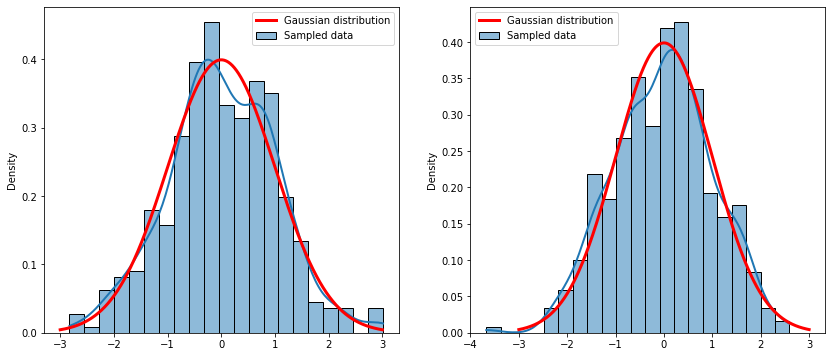

In [660]:
d = 2                   # dimensions
std = 1               # sd of gaussian distribution
mu = np.zeros(d)        # mu of gaussian distribution
steps = 1000         # Total number of states

fig6 = plt.figure(figsize=(14,6))
plt.subplot(121)
mc_gauss = metropolis_hasting_gauss_mod(d, mu, std, steps)
# plt.hist(mc_gauss, bins=20, density=True);
sns.histplot(mc_gauss[:,0], kde=True, stat='density', legend=False, label='Sampled data', line_kws={'lw':2})
horz = np.linspace(-3,3,1000)
norm = [proposal_distribution(x=i, d=1, mu=np.zeros(1), cov=np.eye(1)*std**2) for i in horz]
sns.lineplot(x=horz, y=norm, color='red', lw=3, label='Gaussian distribution');

plt.subplot(122)
sns.histplot(mc_gauss[:,1], kde=True, stat='density', legend=False, label='Sampled data', line_kws={'lw':2})
sns.lineplot(x=horz, y=norm, color='red', lw=3, label='Gaussian distribution');

print(f'Sample Mean: {np.round(mc_gauss.mean(axis=0),2)} - Mu: {mu}, Sample std: {mc_gauss.std():0.4f} - s: {std}')

Sample Mean: [-0.03  0.05  0.06 -0.03] - Mu: [0. 0. 0. 0.], Sample std: 0.9714 - s: 1


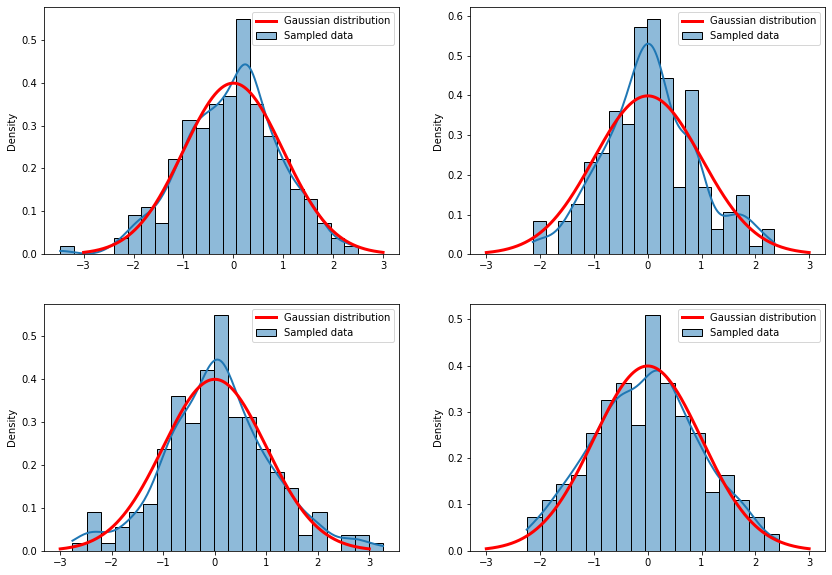

In [665]:
d = 4                   # dimensions
std = 1               # sd of gaussian distribution
mu = np.zeros(d)        # mu of gaussian distribution
steps = 1000         # Total number of states

fig7=plt.figure(figsize=(14,10))

mc_gauss = metropolis_hasting_gauss_mod(d, mu, std, steps)

horz = np.linspace(-3,3,1000)
norm = [proposal_distribution(x=i, d=1, mu=np.zeros(1), cov=np.eye(1)*std**2) for i in horz]

plt.subplot(221)
sns.histplot(mc_gauss[:,0], kde=True, stat='density', legend=False, label='Sampled data', line_kws={'lw':2})
sns.lineplot(x=horz, y=norm, color='red', lw=3, label='Gaussian distribution');

plt.subplot(222)
sns.histplot(mc_gauss[:,1], kde=True, stat='density', legend=False, label='Sampled data', line_kws={'lw':2})
sns.lineplot(x=horz, y=norm, color='red', lw=3, label='Gaussian distribution');

plt.subplot(223)
sns.histplot(mc_gauss[:,2], kde=True, stat='density', legend=False, label='Sampled data', line_kws={'lw':2})
sns.lineplot(x=horz, y=norm, color='red', lw=3, label='Gaussian distribution');

plt.subplot(224)
sns.histplot(mc_gauss[:,3], kde=True, stat='density', legend=False, label='Sampled data', line_kws={'lw':2})
sns.lineplot(x=horz, y=norm, color='red', lw=3, label='Gaussian distribution');

print(f'Sample Mean: {np.round(mc_gauss.mean(axis=0),2)} - Mu: {mu}, Sample std: {mc_gauss.std():0.4f} - s: {std}')

By updating one cordinate at a time, the distribution converges almost twice as fast as the regular algorithm.

Using regular algorithm 2,4 dimensional distribution takes 2000 and 5000 time steps whereas the updated algorithm needs 1000 each timesteps.